In [1]:
from matplotlib import use
use('Agg')
import numpy as np
import matplotlib.pyplot as plt
from gradientDescentMulti import gradientDescentMulti
from normalEqn import normalEqn
from featureNormalize import featureNormalize

In [2]:
# ================ Part 1: Feature Normalization ================

print ('Loading data ...')

# Load Data
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.T.size


# Print out some data points
#print ('First 10 examples from the dataset:')
#print (np.column_stack( (X[:10], y[:10])))

# Scale features and set them to zero mean
print ('Normalizing Features ...')

X_normal, mu, sigma = featureNormalize(X)
print ('mu=',mu,'sigma=',sigma)
# Add intercept term to X
X_normal = np.concatenate((np.ones((m, 1)), X_normal), axis=1)

Loading data ...
Normalizing Features ...
mu= [2000.68085106    3.17021277] sigma= [7.86202619e+02 7.52842809e-01]


Running gradient descent ...


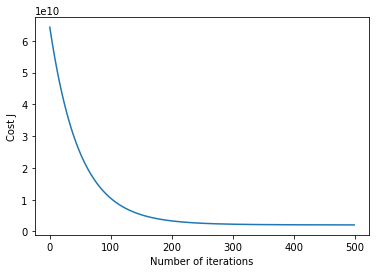

Theta computed from gradient descent: 
[ 3.38175581e+05  1.03031693e+05 -2.02322979e+02]
Predicted price of a 1650 sq-ft, 3 br house
(using gradient descent): 
351761.278602496


In [3]:
%matplotlib inline
# ================ Part 2: Gradient Descent ================
#
# ====================== YOUR CODE HERE ======================
# Instructions: We have provided you with the following starter
#               code that runs gradient descent with a particular
#               learning rate (alpha).
#
#               Your task is to first make sure that your functions -
#               computeCost and gradientDescent already work with
#               this starter code and support multiple variables.
#
#               After that, try running gradient descent with
#               different values of alpha and see which one gives
#               you the best result.
#
#               Finally, you should complete the code at the end
#               to predict the price of a 1650 sq-ft, 3 br house.
#
# Hint: By using the 'hold on' command, you can plot multiple
#       graphs on the same figure.
#
# Hint: At prediction, make sure you do the same feature normalization.
#

print ('Running gradient descent ...')

# Choose some alpha value
alpha = 0.01
num_iters = 500

# Init Theta and Run Gradient Descent 
theta1 = np.zeros(3)
# theta1 进行了特征缩放
theta1, J_history = gradientDescentMulti(X_normal, y, theta1, alpha, num_iters)
# Plot the convergence graph
plt.figure()
plt.plot(range(num_iters),J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()
# Display gradient descent's result
print ('Theta computed from gradient descent: ')
print (theta1)


price = X_normal[0].dot(theta1)

print ('Predicted price of a 1650 sq-ft, 3 br house')
print ('(using gradient descent): ')
print (price)

#raw_input("Program paused. Press Enter to continue...")



In [4]:
# ================ Part 3: Normal Equations ================

# ====================== YOUR CODE HERE ======================
# Instructions: The following code computes the closed form
#               solution for linear regression using the normal
#               equations. You should complete the code in
#               normalEqn.m
#
#               After doing so, you should complete this code
#               to predict the price of a 1650 sq-ft, 3 br house.
#

print ('Solving with normal equations...')

# Add intercept term to X
X = np.concatenate((np.ones((m,1)), X), axis=1)

# Calculate the parameters from the normal equation
# theta2 未进行特征缩放 与theta1数值不等
theta2 = normalEqn(X, y)

# Display normal equation's result
print ('Theta computed from the normal equations:')
print (' %s \n' % theta2)

# Estimate the price of a 1650 sq-ft, 3 br house
price = X[0].dot(theta2)

# ============================================================

print ("Predicted price of a 1650 sq-ft, 3 br house ")
print ('(using normal equations):\n %f\n' % price)



Solving with normal equations...
Theta computed from the normal equations:
 [89597.9095428    139.21067402 -8738.01911233] 

Predicted price of a 1650 sq-ft, 3 br house 
(using normal equations):
 356283.110339



In [5]:
price1 = X_normal[:3].dot(theta1)
price2 = X[:3].dot(theta2)
print(price1,'\n',price2)

[351761.2786025  285712.18116813 390552.01836553] 
 [356283.1103389  286120.93063401 397489.46984811]
